In [39]:
#@title librerías
from google.colab import drive
import os
import math
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
#@title **Se carga el directorio google drive**
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title **Archivos del directorio**
%cd /content/drive/MyDrive/YOLO_CUSTOM_DATASE
%pwd
%ls

/content/drive/MyDrive/YOLO_CUSTOM_DATASE
Change_name.ps1          classes.names  images_ori/  PyTorch-YOLOv3/  Tutorial/
Change_name_replace.ps1  images/        labels/      train.txt        valid.txt


In [ ]:
%pwd
%rm train.txt
%rm valid.txt

rm: cannot remove 'train.txt': No such file or directory


In [ ]:
#@title **Se genera el dataset de entrenamiento y de test**
Directorio = '/content/drive/MyDrive/YOLO_CUSTOM_DATASE'
train = 0.8
test = 0.2
Images = Directorio+'/images'
Total_images = 0
for m in os.listdir(Images):
  Total_images += 1

train = math.floor(Total_images * train)
test = Total_images - train
print('Total Imagenes',Total_images,'\nTotal imagenes entrenamiento',train, '\nTotal imagenes de test', test)

def GenDataSet(Directorio, train, test):
  it=0
  for m in os.listdir(Images):
    if it <= train:
      with open(Directorio + '/' + 'train.txt' , 'a') as writefile:    
        writefile.write('data/custom/images/'+ m +'\n')
    else:
      with open(Directorio + '/' + 'valid.txt' , 'a') as writefile:    
        writefile.write('data/custom/images/'+ m +'\n')  
    it+=1          
##Se generar los archivos de entrenamiento y test
GenDataSet(Directorio, train, test)

Total Imagenes 245 
Total imagenes entrenamiento 196 
Total imagenes de test 49


In [ ]:
#@title Se carga la información en el directorio data/custon de YOLO
%cp -r /content/drive/MyDrive/YOLO_CUSTOM_DATASE/images /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/images
%cp -r /content/drive/MyDrive/YOLO_CUSTOM_DATASE/labels /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/labels
%cp  /content/drive/MyDrive/YOLO_CUSTOM_DATASE/train.txt /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/train.txt
%cp  /content/drive/MyDrive/YOLO_CUSTOM_DATASE/valid.txt /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/valid.txt
%cp  /content/drive/MyDrive/YOLO_CUSTOM_DATASE/classes.names /content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom/classes.names

In [4]:
#@title Se regresa al directorio YOLO
%cd PyTorch-YOLOv3/
%ls

/content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3
assets/       detect.py      models_original.py  __pycache__/      train.py
checkpoints/  LICENSE        models.py           README.md         utils/
config/       logs/          output/             requirements.txt  weights/
data/         models_mdf.py  plot_yolo_log.py    test.py


In [5]:
#@title validamos el directorio custom de YOLO
%cd data/custom/
%ls

/content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/data/custom
classes.names  images/  labels/  train.txt  valid.txt


In [6]:
#@title Regresamos el directorio raiz de YOLO
%cd ../..
%pwd

/content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3


'/content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3'

In [ ]:
#@title Instalar los requerimientos:
!pip3 install -r requirements.txt

In [30]:
#@title Se realiza entrenamiento del modelo original:
##Sentencia cuando se desea iniciar por primera vez
#!python3 train.py --model_def config/yolov3-tiny_custom.cfg --data config/custom.data --pretrained_weights weights/yolov3-tiny.weights --epochs 100
##Sentencia cuando se desea iniciar a partir de un checkpoint:
!python3 train.py --model_def config/yolov3-tiny_custom.cfg --data config/custom.data --pretrained_weights checkpoints/yolov3_ckpt_99.pth --epochs 100

Se han truncado las últimas 5000 líneas del flujo de salida.
| recall50   | 1.000000     | 1.000000     |
| recall75   | 0.850000     | 1.000000     |
| precision  | 1.000000     | 0.913043     |
| conf_obj   | 0.999429     | 0.998262     |
| conf_noobj | 0.000117     | 0.000160     |
+------------+--------------+--------------+
Total loss 0.10467073321342468
---- ETA 0:00:04.955727
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] War

In [58]:
#@title Se realiza la predicción del modelo:
!python3 detect.py --model_def config/yolov3-tiny_custom.cfg --weights_path checkpoints/yolov3_ckpt_99.pth --image_folder data/samples/sample_custom/ --class_path data/custom/classes.names --conf_thres 0.8

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.8, image_folder='data/samples/sample_custom/', img_size=416, model_def='config/yolov3-tiny_custom.cfg', n_cpu=0, nms_thres=0.4, weights_path='checkpoints/yolov3_ckpt_99.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.035099
	+ Batch 1, Inference Time: 0:00:00.027302
	+ Batch 2, Inference Time: 0:00:00.022192
	+ Batch 3, Inference Time: 0:00:00.024178
	+ Batch 4, Inference Time: 0:00:00.215055
	+ Batch 5, Inference Time: 0:00:00.242494
	+ Batch 6, Inference Time: 0:00:00.239431
	+ Batch 7, Inference Time: 0:00:00.279895
	+ Batch 8, Inference Time: 0:00:00.208455
	+ Batch 9, Inference Time: 0:00:00.263535

Saving images:
(0) Image: 'data/samples/sample_custom/ag_img_40.jpg'
	+ Label: helmet, Conf: 1.00000
(1) Image: 'data/samples/sample_custom/cm_img_31.png'
	+ Label: helmet, Conf: 1.00000
	+ Label: helmet, Conf: 1.00000
	+ Label: helmet, Conf: 1.00000
	+ Label: hel

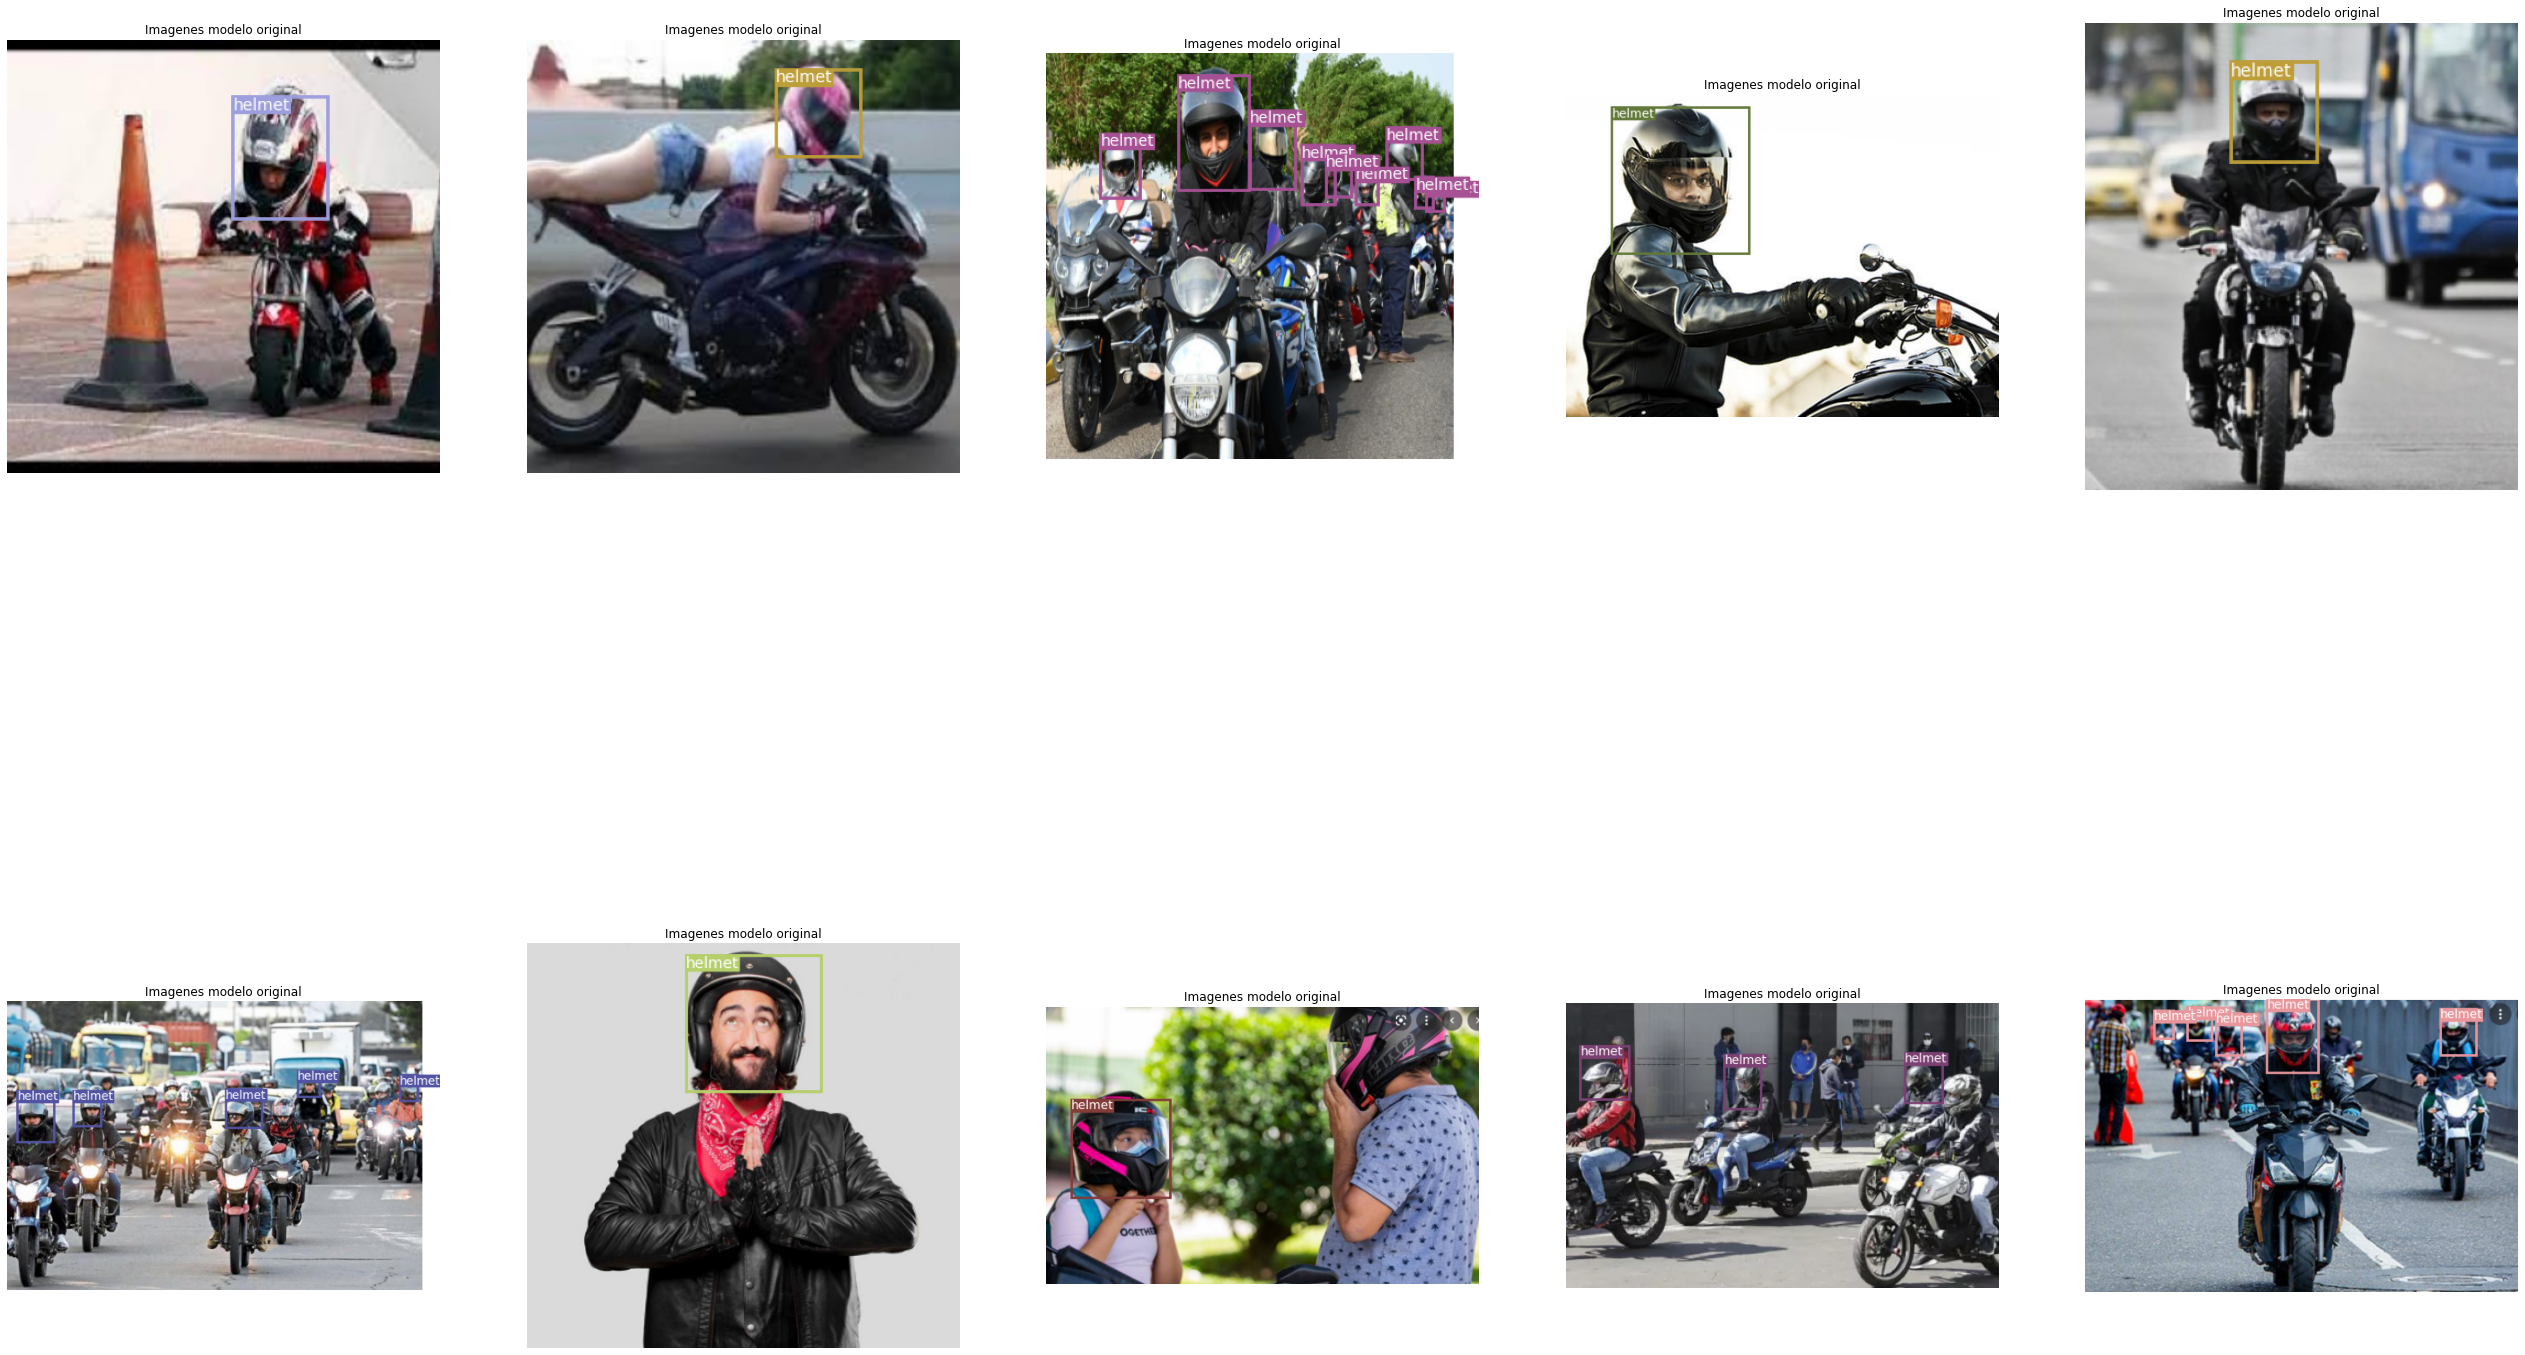

In [65]:
#@title **Validación de imagenes con Modelo original**
Directorio = '/content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/output'
plt.figure(figsize=(45,30))
pos = 1
for m in os.listdir(Directorio):
  name = Directorio + '/' + m
  plt.title('Imagenes modelo original')
  if m != '.ipynb_checkpoints':
    img = cv2.imread(name)
    plt.subplot(2,5,pos)
    plt.imshow(img[:,:,(2,1,0)]) 
    plt.axis('off')
    pos += 1
plt.title('Imagenes modelo original')
plt.show()

In [ ]:
!python3 plot_yolo_log.py logs/2021_11_24__02_54_51/events.out.tfevents.1637722495.69971e765bfd.4984.0

In [70]:
##Crear YOLO + modulo de atención.
##Sentencia cuando se desea iniciar por primera vez
#!python3 train.py --model_def config/yolov3-tiny_custom_se.cfg --data config/custom.data --pretrained_weights weights/yolov3-tiny.weights --epochs 100
##Sentencia cuando se desea iniciar a partir de un checkpoint:
!python3 train.py --model_def config/yolov3-tiny_custom_se.cfg --data config/custom.data --pretrained_weights checkpoints/yolov3_ckpt_99.pth --epochs 100

Se han truncado las últimas 5000 líneas del flujo de salida.
| recall50   | 1.000000     | 1.000000     |
| recall75   | 1.000000     | 1.000000     |
| precision  | 0.937500     | 0.833333     |
| conf_obj   | 0.999145     | 0.999384     |
| conf_noobj | 0.000143     | 0.000181     |
+------------+--------------+--------------+
Total loss 0.11213687062263489
---- ETA 0:00:04.526475
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:30] War

In [74]:
!python3 detect.py --model_def config/yolov3-tiny_custom_se.cfg --weights_path checkpoints/yolov3_ckpt_22.pth --image_folder data/samples/sample_custom/ --class_path data/custom/classes.names --conf_thres 0.8

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.8, image_folder='data/samples/sample_custom/', img_size=416, model_def='config/yolov3-tiny_custom_se.cfg', n_cpu=0, nms_thres=0.4, weights_path='checkpoints/yolov3_ckpt_22.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.036666
	+ Batch 1, Inference Time: 0:00:00.030464
	+ Batch 2, Inference Time: 0:00:00.025525
	+ Batch 3, Inference Time: 0:00:00.025890
	+ Batch 4, Inference Time: 0:00:00.028939
	+ Batch 5, Inference Time: 0:00:00.033456
	+ Batch 6, Inference Time: 0:00:00.024760
	+ Batch 7, Inference Time: 0:00:00.032465
	+ Batch 8, Inference Time: 0:00:00.023117
	+ Batch 9, Inference Time: 0:00:00.038671

Saving images:
(0) Image: 'data/samples/sample_custom/ag_img_40.jpg'
	+ Label: helmet, Conf: 1.00000
(1) Image: 'data/samples/sample_custom/cm_img_31.png'
	+ Label: helmet, Conf: 1.00000
	+ Label: helmet, Conf: 1.00000
	+ Label: helmet, Conf: 1.00000
	+ Label: 

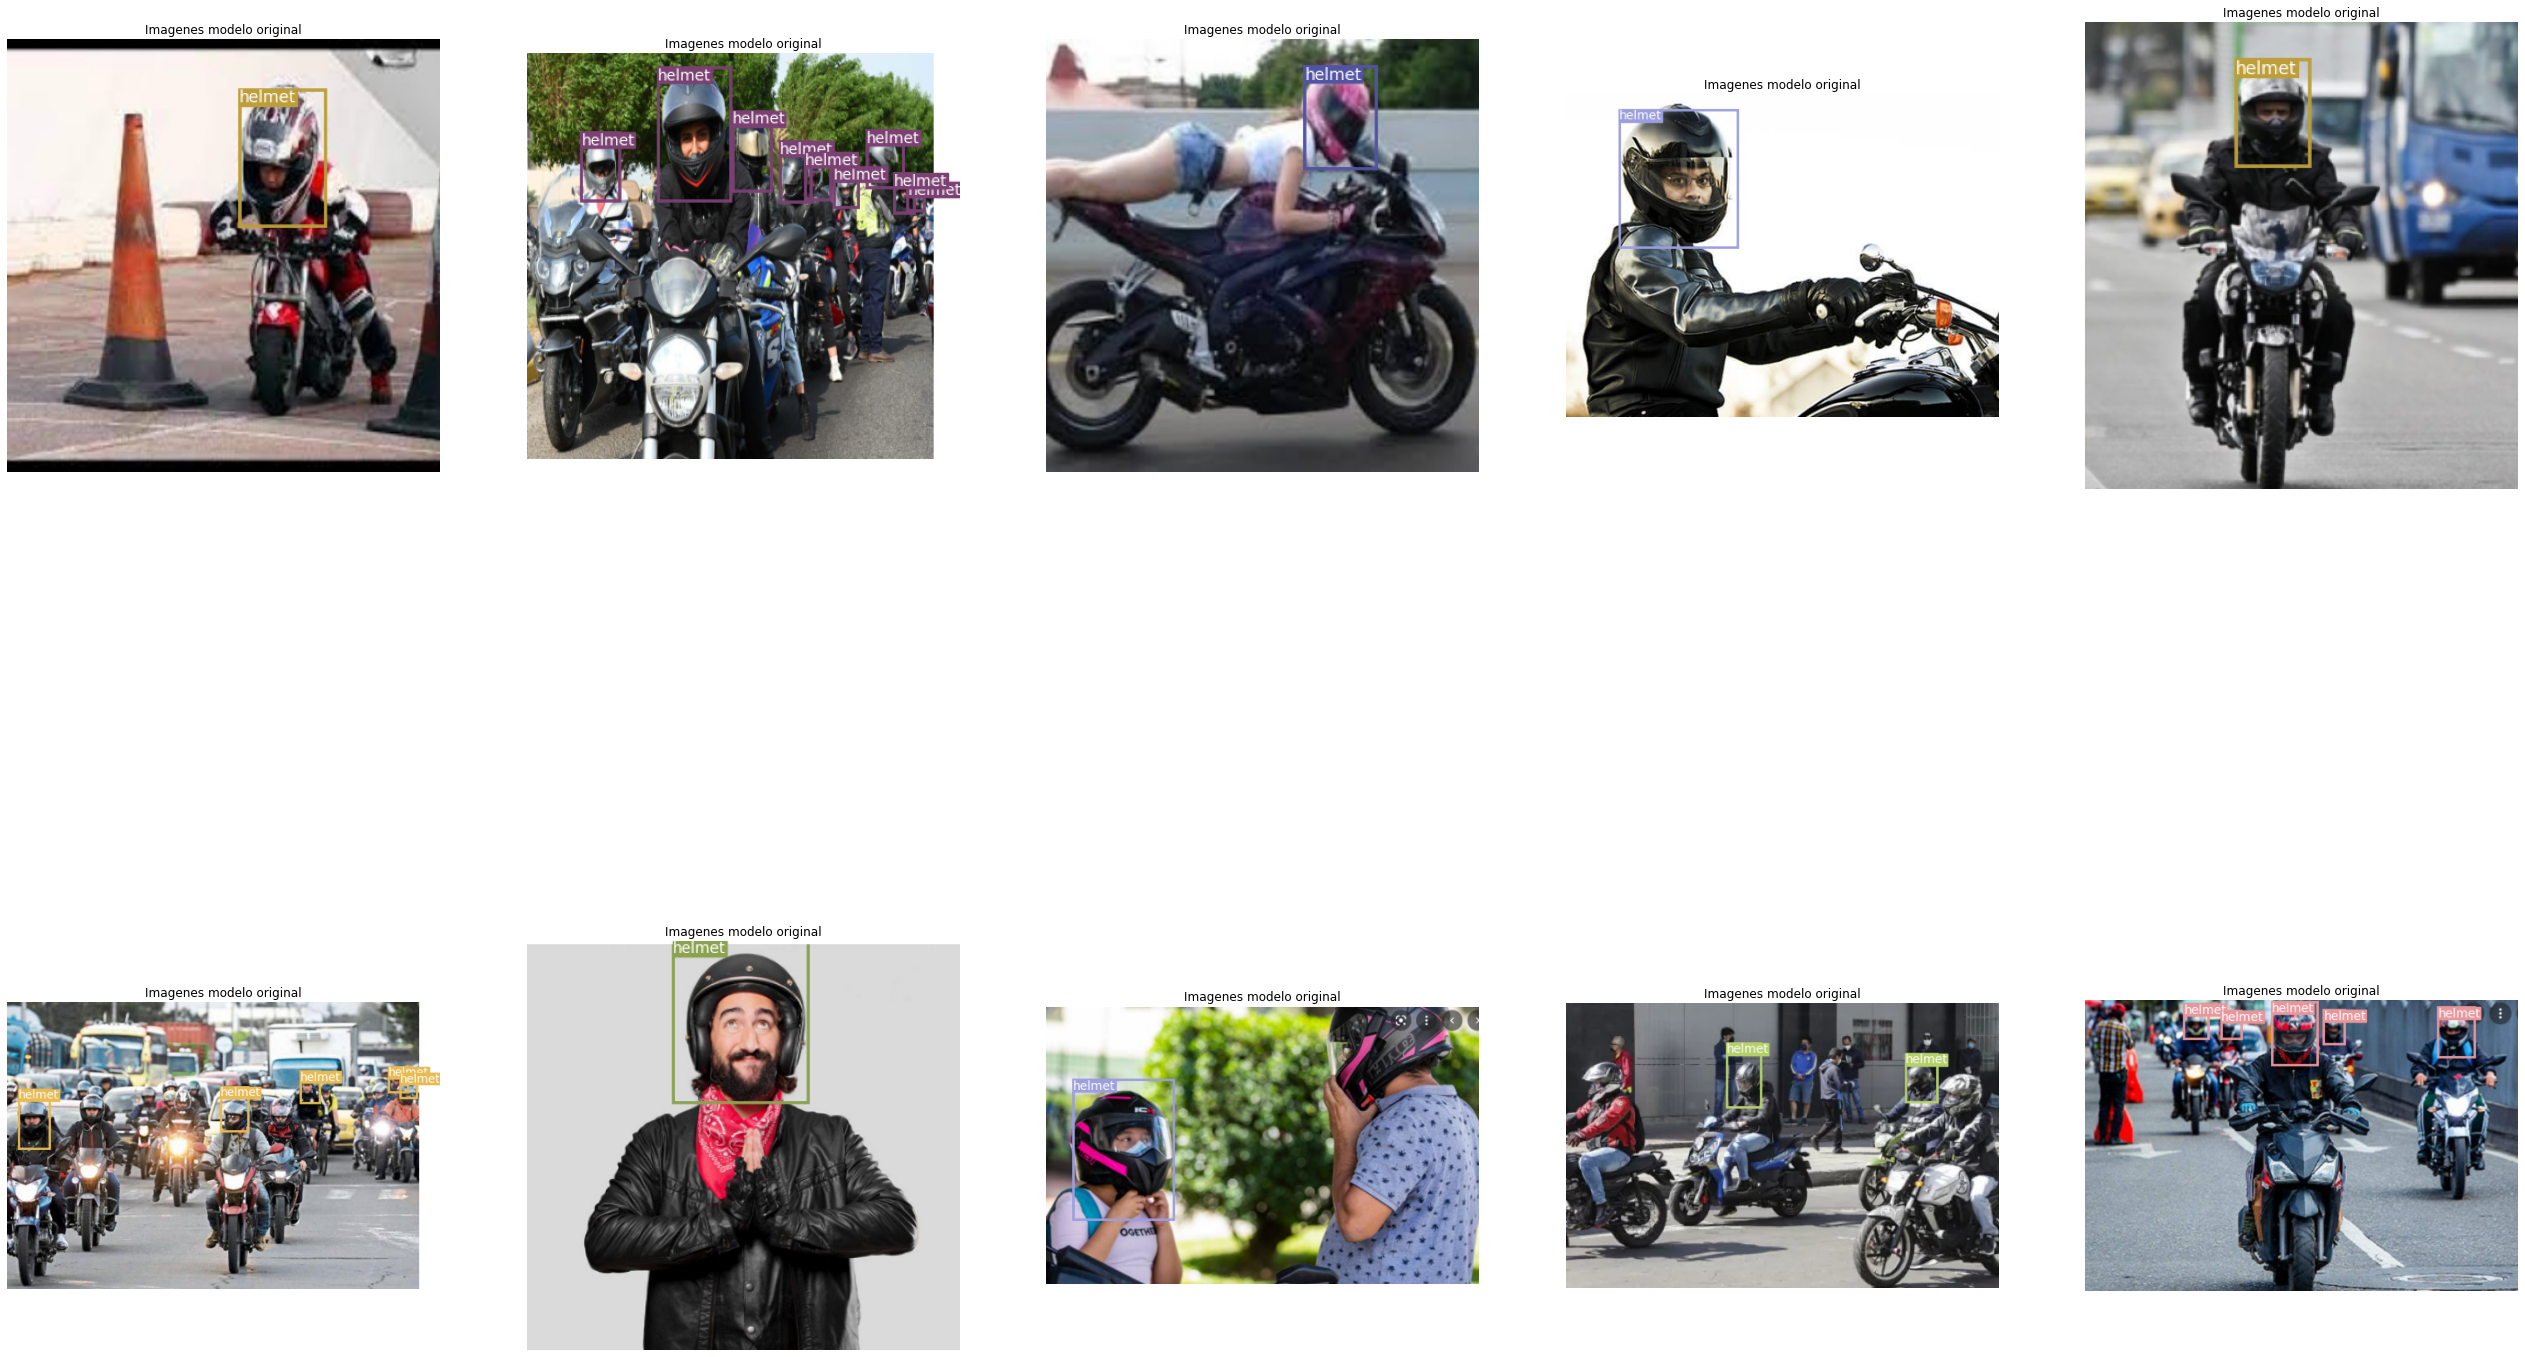

In [78]:
#@title **Validación de imagenes con Modelo SE**
Directorio = '/content/drive/MyDrive/YOLO_CUSTOM_DATASE/PyTorch-YOLOv3/output'
plt.figure(figsize=(45,30))
pos = 1
for m in os.listdir(Directorio):
  name = Directorio + '/' + m
  plt.title('Imagenes modelo original')
  if m != '.ipynb_checkpoints' and  m != 'curve.png':
    img = cv2.imread(name)
    plt.subplot(2,5,pos)
    plt.imshow(img[:,:,(2,1,0)]) 
    plt.axis('off')
    pos += 1
plt.title('Imagenes modelo original')
plt.show()

In [73]:
!python3 plot_yolo_log.py logs/2021_11_24__03_58_38/events.out.tfevents.1637726321.69971e765bfd.14374.0

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['loss_1', 'x_1', 'y_1', 'w_1', 'h_1', 'conf_1', 'cls_1', 'cls_acc_1', 'recall50_1', 'recall75_1', 'precision_1', 'conf_obj_1', 'conf_noobj_1', 'loss_2', 'x_2', 'y_2', 'w_2', 'h_2', 'conf_2', 'cls_2', 'cls_acc_2', 'recall50_2', 'recall75_2', 'precision_2', 'conf_obj_2', 'conf_noobj_2', 'loss', 'val_precision', 'val_recall', 'val_mAP', 'val_f1'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
100
[ScalarEvent(wall_time=1637726332.4461555, step=0, value=0.40915730595588684), ScalarEvent(wall_time=1637726341.0848641, step=1, value=0.36067458987236023), ScalarEvent(wall_time=1637726350.2022238, step=2, value=0.3482915163040161), ScalarEvent(wall_time=1637726358.3256335, step=3, value=0.5598766803741455), ScalarEvent(wall_time=1637726367.8459942, step=4, value=0.4858269989490509), ScalarEvent(wall_time=1637726377.2751787, step=5, value=0.5998863577842712), ScalarEvent(wall_time=1637726386.